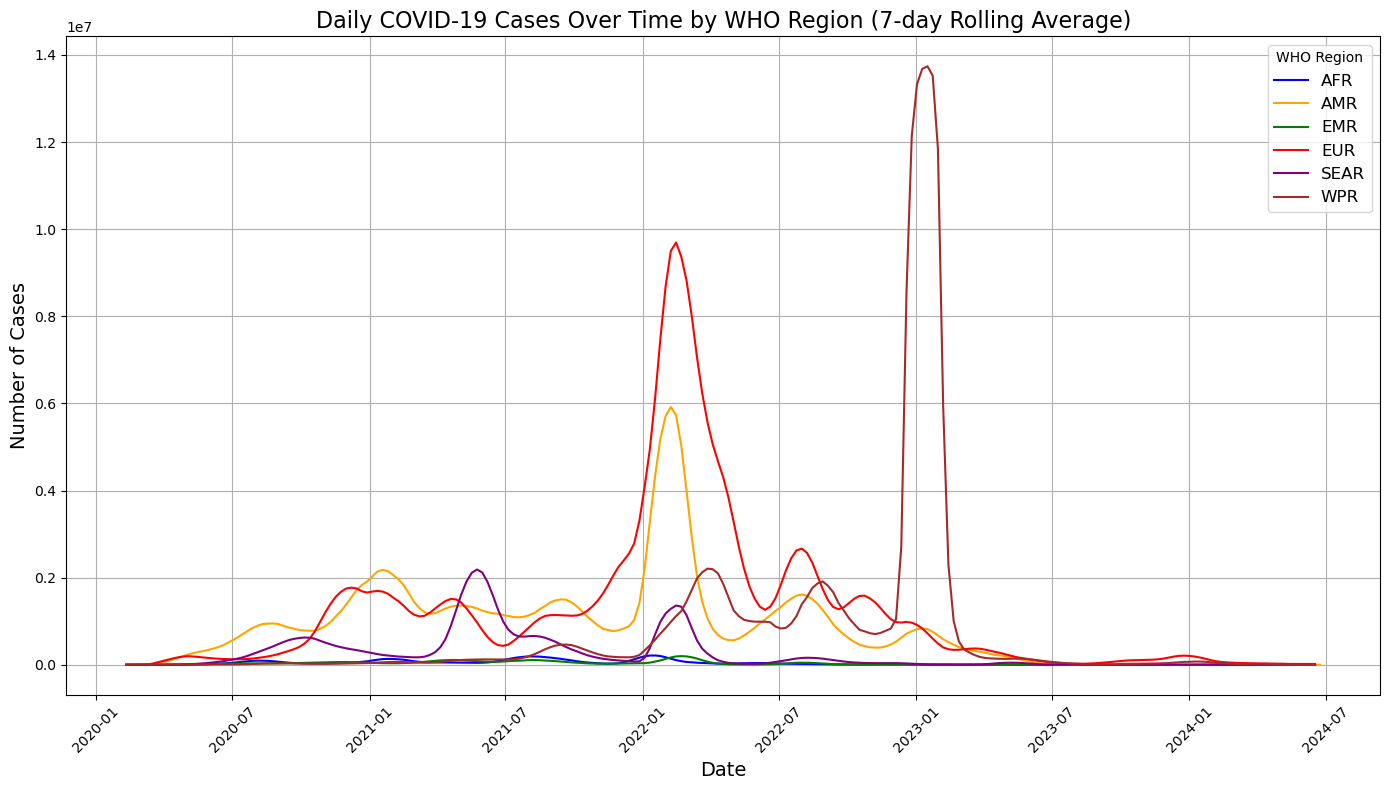

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import geopandas as gpd

# Load the dataset
file_path = r"Resources/case_death_test_dataset.csv"
data = pd.read_csv(file_path)
# Convert the ISO_START_DATE column to datetime format
data['ISO_START_DATE'] = pd.to_datetime(data['ISO_START_DATE'])

# Group by date and WHO region, and sum the cases to get the daily cases for each region
daily_cases_region = data.groupby(['ISO_START_DATE', 'WHO_REGION'])['DAILY_CASES'].sum().reset_index()

# Pivot the data to have regions as columns
pivot_daily_cases_region = daily_cases_region.pivot(index='ISO_START_DATE', columns='WHO_REGION', values='DAILY_CASES')

# Calculate the rolling mean for smoothing the curves (7-day window)
pivot_daily_cases_region = pivot_daily_cases_region.rolling(window=7).mean()

# Plot the trend of daily cases over time for different WHO regions
plt.figure(figsize=(14, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, region in enumerate(pivot_daily_cases_region.columns):
    plt.plot(pivot_daily_cases_region.index, pivot_daily_cases_region[region], label=region, color=colors[i % len(colors)])

plt.title('Daily COVID-19 Cases Over Time by WHO Region (7-day Rolling Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.legend(title='WHO Region', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


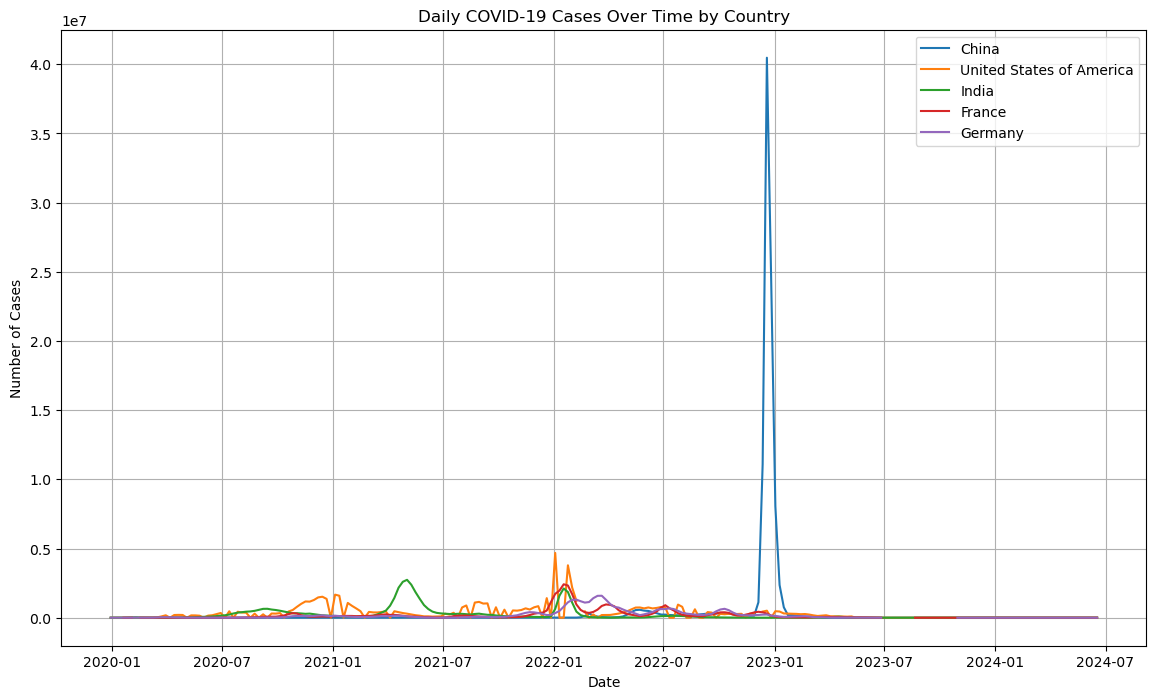

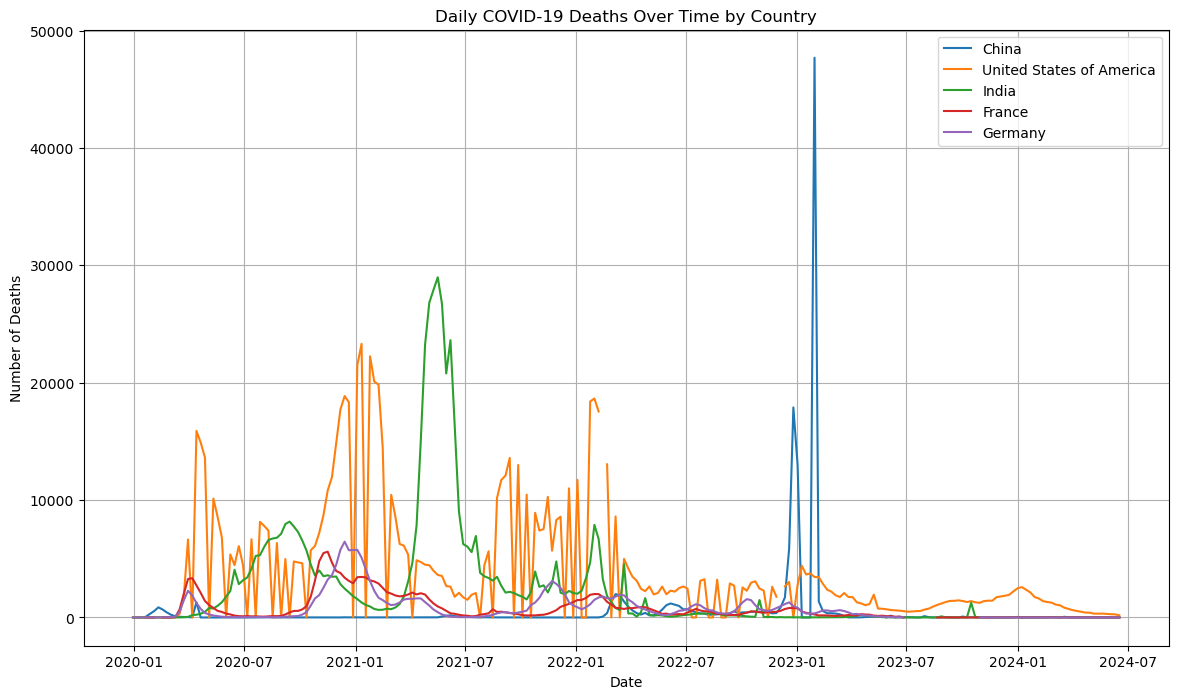

In [6]:
# Select a few countries for comparison
countries_to_compare = ['China', 'United States of America', 'India', 'France', 'Germany']

# Filter the data for the selected countries
filtered_data = data[data['COUNTRY_NAME'].isin(countries_to_compare)]

# Group by date and country, and sum the cases to get the daily cases for each country
daily_cases_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES'].sum().reset_index()

# Pivot the data to have countries as columns for cases
pivot_daily_cases = daily_cases_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES')

# Group by date and country, and sum the deaths to get the daily deaths for each country
daily_deaths_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES_DEATHS'].sum().reset_index()

# Pivot the data to have countries as columns for deaths
pivot_daily_deaths = daily_deaths_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES_DEATHS')

# Plot the trend of daily cases over time for the selected countries
plt.figure(figsize=(14, 8))

for country in countries_to_compare:
    plt.plot(pivot_daily_cases.index, pivot_daily_cases[country], label=country)

plt.title('Daily COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trend of daily deaths over time for the selected countries
plt.figure(figsize=(14, 8))

for country in countries_to_compare:
    plt.plot(pivot_daily_deaths.index, pivot_daily_deaths[country], label=country)

plt.title('Daily COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
# Group by country and sum the deaths
total_deaths_per_country = data.groupby('COUNTRY_NAME')['DAILY_CASES_DEATHS'].sum().reset_index()
# Sort the countries by total deaths in descending order and select the top five
top_five_countries_deaths = total_deaths_per_country.sort_values(by='DAILY_CASES_DEATHS', ascending=False).head(5)
print(top_five_countries_deaths)



                 COUNTRY_NAME  DAILY_CASES_DEATHS
230  United States of America            907430.0
36                     Brazil            702116.0
110                     India            533621.0
182        Russian Federation            403072.0
150                    Mexico            335011.0


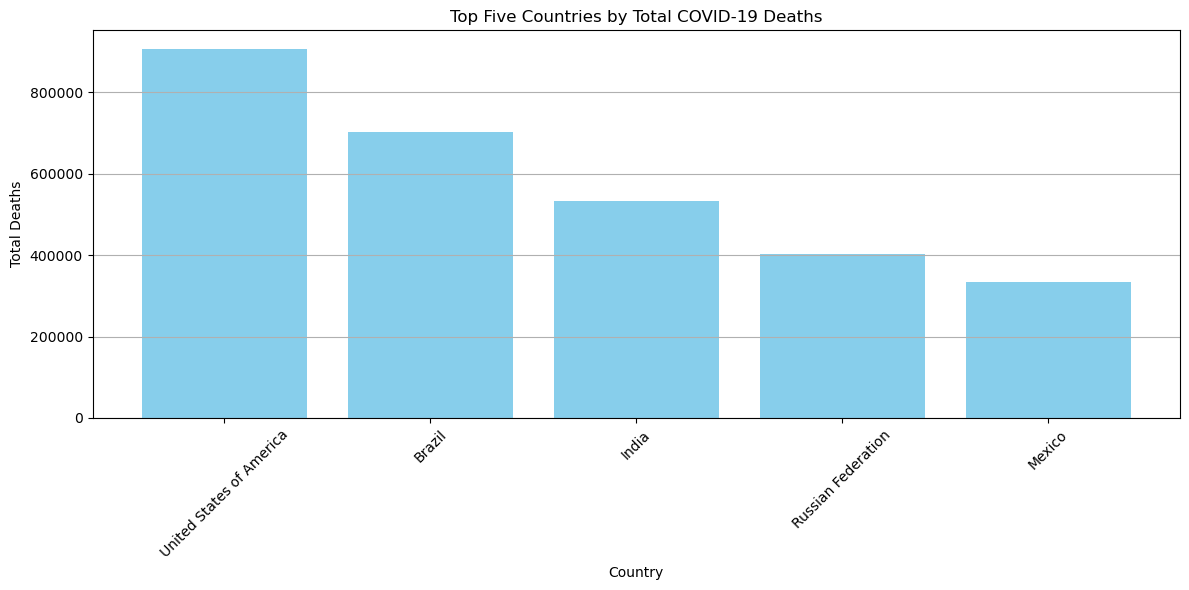

In [14]:
# Create a bar graph for the top five countries with the highest total COVID-19 deaths
plt.figure(figsize=(12, 6))
plt.bar(top_five_countries_deaths['COUNTRY_NAME'], top_five_countries_deaths['DAILY_CASES_DEATHS'], color='skyblue')
plt.title('Top Five Countries by Total COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


                 COUNTRY_NAME  DAILY_CASES
55                      China   99361338.0
230  United States of America   72385622.0
110                     India   45040284.0
85                     France   38997490.0
93                    Germany   38437756.0


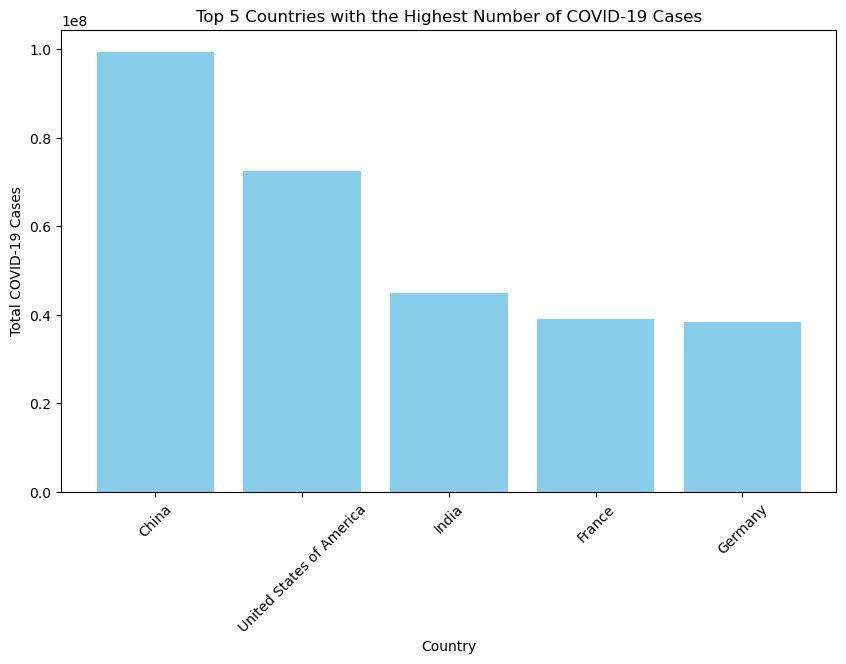

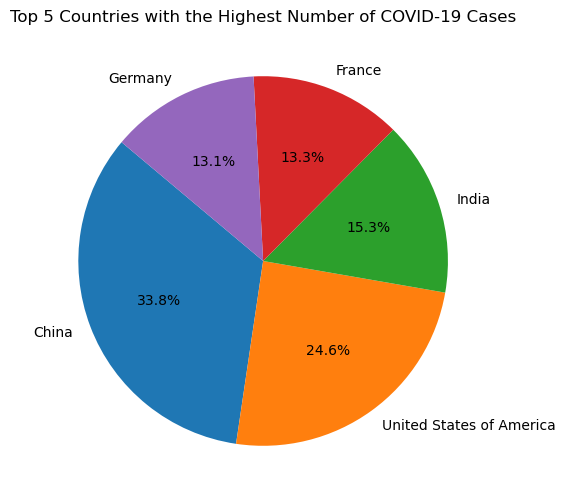

In [12]:
# Summarize total cases by country
total_cases_by_country = data.groupby('COUNTRY_NAME')['DAILY_CASES'].sum().reset_index()

# Sort by total cases in descending order and get the top five countries
top_five_countries = total_cases_by_country.sort_values(by='DAILY_CASES', ascending=False).head(5)

# Print the top five countries with the highest number of cases
print(top_five_countries)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_five_countries['COUNTRY_NAME'], top_five_countries['DAILY_CASES'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Cases')
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_five_countries['DAILY_CASES'], labels=top_five_countries['COUNTRY_NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.show()



----------------------------
Serum_Analysis


In [16]:
# Extract the dataset
serum_path = Path("Resources/serum_dataset.csv")
serum_data = pd.read_csv(serum_path, encoding="latin-1")

serum_data.columns

Index(['estimate_name', 'study_name', 'source_name', 'publication_date',
       'source_type', 'estimate_grade', 'study_type', 'country', 'state',
       'city', 'study_inclusion_criteria', 'study_exclusion_criteria',
       'sampling_start_date', 'sampling_end_date', 'population_group', 'sex',
       'age', 'age_min', 'age_max', 'subgroup_var',
       'subgroup_specific_category', 'denominator_value',
       'serum_pos_prevalence', 'seroprev_95_ci_lower', 'seroprev_95_ci_upper',
       'dashboard_primary_estimate', 'test_adj', 'pop_adj',
       'clustering_adjustment', 'academic_primary_estimate', 'sampling_method',
       'test_name', 'test_manufacturer', 'test_type', 'specimen_type',
       'isotypes', 'antibody_target', 'test_validation', 'sensitivity',
       'specificity', 'overall_risk_of_bias', 'jbi_1', 'jbi_2', 'jbi_3',
       'jbi_4', 'jbi_5', 'jbi_6', 'jbi_7', 'jbi_8', 'jbi_9', 'first_author',
       'lead_institution', 'is_unity_aligned', 'url', 'date_created',
       'last

In [18]:
# Filter the columns
serum_clean_data = serum_data[["study_type","country","population_group","sex","age","age_min","age_max","serum_pos_prevalence",\
                               "seroprev_95_ci_lower","seroprev_95_ci_upper","academic_primary_estimate"]]

serum_clean_data.head()

,study_type,country,population_group,sex,age,age_min,age_max,serum_pos_prevalence,seroprev_95_ci_lower,seroprev_95_ci_upper,academic_primary_estimate
0,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,5.0,NaN,0.3150,NaN,NaN,True
1,Cross-sectional survey,Afghanistan,Household and community samples,All,Children and Youth (0-17 years),5.0,17.0,0.3510,0.310,0.395,NaN
2,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,18.0,NaN,0.2530,0.205,0.308,NaN
3,Cross-sectional survey,Afghanistan,Essential non-healthcare workers,All,Adults (18-64 years),NaN,NaN,0.0190,NaN,NaN,True
4,Cross-sectional survey,Albania,Household and community samples,All,Multiple groups,18.0,70.0,0.7335,NaN,NaN,True


In [20]:
# Check the unique ages
serum_clean_data["age_min"].unique()

array([  5. ,  18. ,   nan,  60. ,  22. ,   4. ,   1. ,  20. ,  70. ,
        10. ,  50. ,  40. ,  30. ,  80. ,   2. ,  90. ,  12. ,  41. ,
        14. ,  19. ,  21. ,  65. ,  46. ,  15. ,  13. ,  61. ,   0. ,
        16. ,  23. ,   7. ,   9. ,  17. ,   6. ,  11. ,   8. ,  36. ,
        56. ,  26. ,  25. ,  35. ,  45. ,  55. ,  31. ,  51. ,  21.6,
        20.1,  66. ,  81. ,   3. ,  71. ,  24. ,  42. ,  75. ,  28. ,
        38. ,  32. ,  47. ,  27. ,  57. ,  85. ,  29. ,  20.3,  33. ,
        48. ,  53. ,  43. ,  67. ,  34. ,  37. ,  78. ,  58. ,  74. ,
        59. , 100. ,  69. ,  63. ,  68. ])

In [22]:
# Check how many values
serum_clean_data["age_min"].value_counts()

age_min
0.0     3359
17.0    3151
18.0    2382
16.0    1779
60.0     555
        ... 
20.3       1
57.0       1
20.1       1
21.6       1
68.0       1
Name: count, Length: 76, dtype: int64

In [24]:
# Format the column age_min
serum_clean_data_na = serum_clean_data.dropna(subset=["age_min"])
serum_clean_data_na.loc[:,"age_min"] = serum_clean_data_na["age_min"].astype(int)

serum_clean_data_na

,study_type,country,population_group,sex,age,age_min,age_max,serum_pos_prevalence,seroprev_95_ci_lower,seroprev_95_ci_upper,academic_primary_estimate
0,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,5.0,NaN,0.3150,NaN,NaN,True
1,Cross-sectional survey,Afghanistan,Household and community samples,All,Children and Youth (0-17 years),5.0,17.0,0.3510,0.310,0.395,NaN
2,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,18.0,NaN,0.2530,0.205,0.308,NaN
4,Cross-sectional survey,Albania,Household and community samples,All,Multiple groups,18.0,70.0,0.7335,NaN,NaN,True
5,Cross-sectional survey,Albania,Household and community samples,All,Seniors (65+ years),60.0,70.0,0.8170,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21240,Repeated cross-sectional study,occupied Palestinian territory - including eas...,Household and community samples,Female,Multiple groups,18.0,NaN,0.6180,NaN,NaN,NaN
21241,NaN,NaN,Household and community samples,All,Multiple groups,20.0,NaN,0.0220,0.019,0.025,True
21242,NaN,NaN,Household and community samples,All,Multiple groups,20.0,NaN,0.9630,0.958,0.966,True
21243,NaN,NaN,Household and community samples,All,Multiple groups,20.0,NaN,0.0220,0.019,0.025,NaN


In [28]:
# Group the age interval
bins = [0,20,30,40,50,60,70,80,100]
labels = ["0-20","20-30","30-40","40-50","50-60","60-70","70-80","80-100"]
serum_clean_data_na.loc[:,"age_min_group"] = pd.cut(serum_clean_data_na["age_min"],bins = bins, labels = labels)

serum_clean_data_na.head()

,study_type,country,population_group,sex,age,age_min,age_max,serum_pos_prevalence,seroprev_95_ci_lower,seroprev_95_ci_upper,academic_primary_estimate,age_min_group
0,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,5.0,NaN,0.3150,NaN,NaN,True,0-20
1,Cross-sectional survey,Afghanistan,Household and community samples,All,Children and Youth (0-17 years),5.0,17.0,0.3510,0.310,0.395,NaN,0-20
2,Cross-sectional survey,Afghanistan,Household and community samples,All,Multiple groups,18.0,NaN,0.2530,0.205,0.308,NaN,0-20
4,Cross-sectional survey,Albania,Household and community samples,All,Multiple groups,18.0,70.0,0.7335,NaN,NaN,True,0-20
5,Cross-sectional survey,Albania,Household and community samples,All,Seniors (65+ years),60.0,70.0,0.8170,NaN,NaN,NaN,50-60


In [30]:
# Calculate the average serum positive prevalence in every age interval
serum_age = serum_clean_data_na.groupby("age_min_group",observed=True)["serum_pos_prevalence"].mean()
serum_age

age_min_group
0-20      0.391084
20-30     0.308210
30-40     0.315546
40-50     0.250856
50-60     0.309129
60-70     0.232465
70-80     0.192113
80-100    0.195811
Name: serum_pos_prevalence, dtype: float64

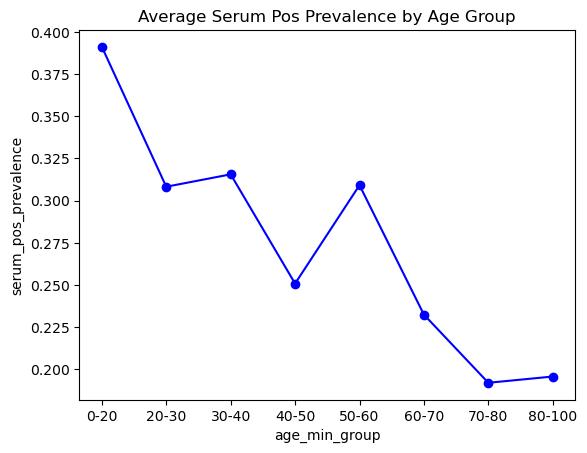

In [32]:
# Generate the line plot
serum_age.plot(kind="line",title="Average Serum Pos Prevalence by Age Group",\
               xlabel="age_min_group",ylabel="serum_pos_prevalence",marker="o",color="blue")

plt.savefig("output_data/Fig_serum_age.png")

In [34]:
# Figure out how many unique country in dataset
serum_clean_data_na["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Croatia', 'Cyprus', 'Czechia', "C??te d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic

In [36]:
# Calculate the average serum positive prevalence in every country
serum_country = serum_clean_data_na.groupby("country",observed=False)["serum_pos_prevalence"].mean()
serum_country = serum_country.rename_axis("name")
serum_country

name
Afghanistan                                                  0.306333
Albania                                                      0.675633
Algeria                                                      0.358550
Andorra                                                      0.133429
Angola                                                       0.035667
                                                               ...   
Viet Nam                                                     0.254221
Yemen                                                        0.300667
Zambia                                                       0.114727
Zimbabwe                                                     0.141647
occupied Palestinian territory - including east Jerusalem    0.405260
Name: serum_pos_prevalence, Length: 134, dtype: float64

In [38]:
# Figure out top 10 prevalence of countries
serum_country_sorted = serum_country.sort_values(ascending=False)
serum_country_sorted_top = serum_country_sorted.iloc[:10]
serum_country_to_df = serum_country_sorted_top.to_frame()
serum_country_to_df = serum_country_to_df.rename_axis("Country")
serum_country_to_df = serum_country_to_df.rename(columns ={"serum_pos_prevalence":"Serum positive prevalence"})
serum_country_to_df["Serum positive prevalence"] = round(serum_country_to_df["Serum positive prevalence"],3)
serum_country_to_df = serum_country_to_df.reset_index()
serum_country_to_df.index += 1
serum_country_to_df

,Country,Serum positive prevalence
1,Armenia,0.986
2,Fiji,0.955
3,Tajikistan,0.942
4,French Polynesia,0.918
5,Sierra Leone,0.889
6,Jamaica,0.862
7,Central African Republic,0.765
8,Slovakia,0.745
9,Albania,0.676
10,Syrian Arab Republic,0.638


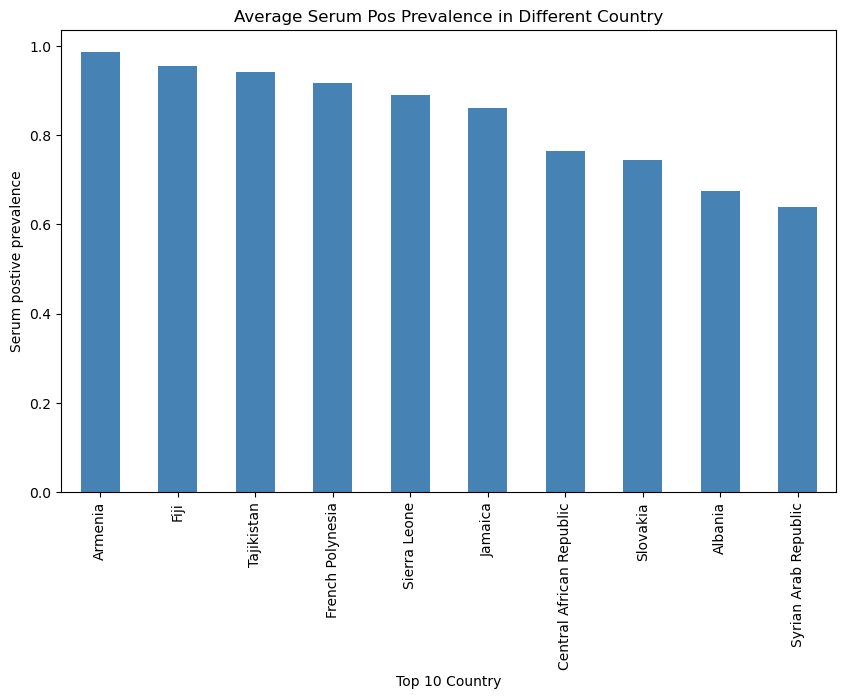

In [40]:
# Create the bar chart for top 10
serum_country_sorted_top.plot(kind="bar",title="Average Serum Pos Prevalence in Different Country",\
               xlabel="Top 10 Country",ylabel="Serum postive prevalence",color="steelblue",figsize=(10,6))
plt.savefig("output_data/Fig_serum_top10country.png")
plt.show()

/var/folders/d7/tvjrqth10gb5pst1dd7n9wl40000gn/T/ipykernel_25424/1962900343.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  file_path = gpd.datasets.get_path("naturalearth_lowres")


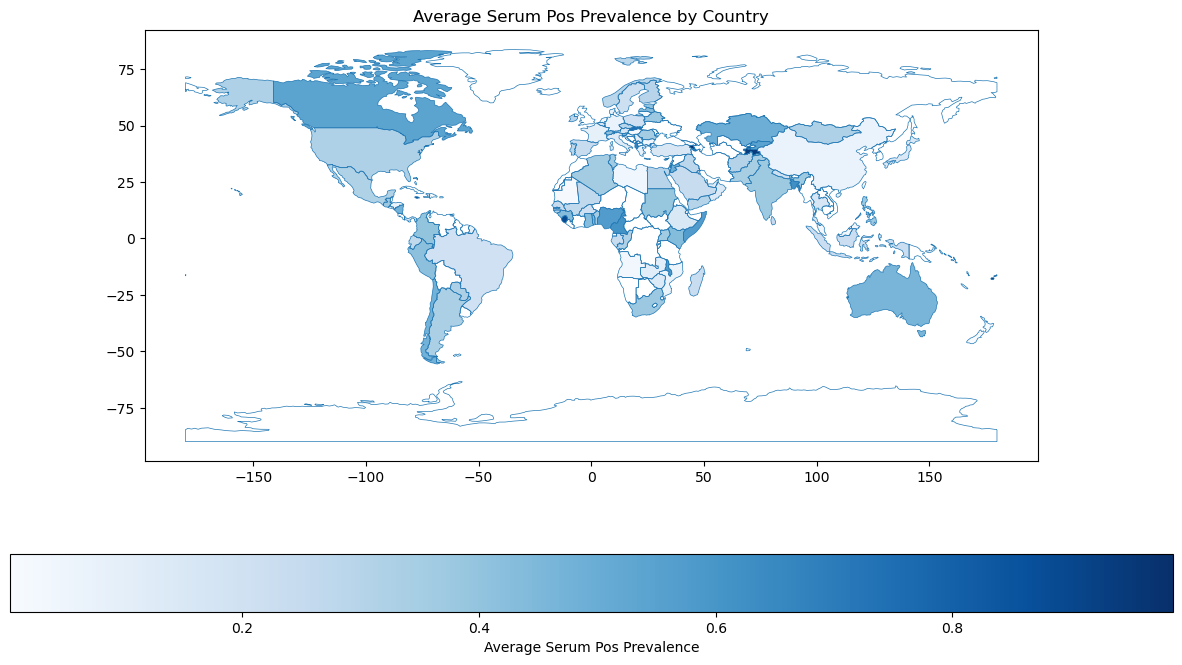

In [42]:
# Create the map with serum positive prevalence of all countries
file_path = gpd.datasets.get_path("naturalearth_lowres")
world = gpd.read_file(file_path)
world = world.merge(serum_country, how="left", on = "name")
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax,linewidth=0.5)
world.plot(column='serum_pos_prevalence', ax=ax, legend=True, cmap='Blues',
           legend_kwds={'label': "Average Serum Pos Prevalence",
                        'orientation': "horizontal"})
plt.title("Average Serum Pos Prevalence by Country")
plt.savefig("output_data/Fig_serum_country.png")
plt.show()

In [44]:
# Figure out how many values in two genders
serum_clean_data["sex"].value_counts()

sex
All       19053
Female     1263
Male        911
Other        17
Name: count, dtype: int64

In [46]:
# Clean the dataset for gender analysis
data_sex = serum_clean_data.loc[(serum_clean_data["sex"]=="Female") | (serum_clean_data["sex"]=="Male")]
data_sex.head()

,study_type,country,population_group,sex,age,age_min,age_max,serum_pos_prevalence,seroprev_95_ci_lower,seroprev_95_ci_upper,academic_primary_estimate
6,Cross-sectional survey,Albania,Household and community samples,Female,Multiple groups,18.0,70.0,0.7525,NaN,NaN,NaN
10,Cross-sectional survey,Albania,Household and community samples,Male,Multiple groups,18.0,70.0,0.6971,NaN,NaN,NaN
55,Repeated cross-sectional study,Andorra,Household and community samples,Female,Multiple groups,2.0,NaN,0.1250,NaN,NaN,NaN
61,Repeated cross-sectional study,Andorra,Household and community samples,Male,Multiple groups,2.0,NaN,0.1240,NaN,NaN,NaN
72,Cross-sectional survey,Angola,Residual sera,Male,Multiple groups,12.0,67.0,0.0120,NaN,NaN,NaN


In [48]:
# Calculate the average of two genders group
serum_sex = data_sex.groupby("sex")["serum_pos_prevalence"].mean()
serum_sex

sex
Female    0.291151
Male      0.300321
Name: serum_pos_prevalence, dtype: float64

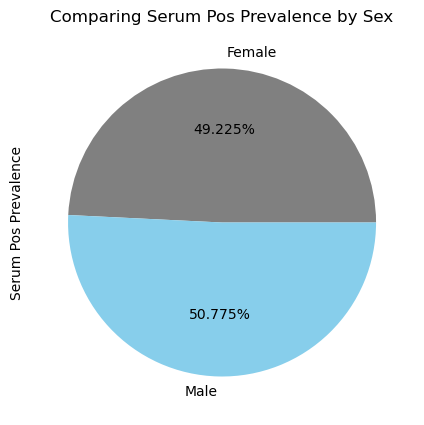

In [50]:
# Create the pie chart to compare
Pie_plot = serum_sex.plot(kind="pie", figsize=(5,5),label="Serum Pos Prevalence",autopct="%1.3f%%",colors = ["grey", "skyblue"])
plt.title("Comparing Serum Pos Prevalence by Sex")

plt.show()